# Predator-Prey System

Copyright (C) 2020 Andreas Kloeckner

<details>
<summary>MIT License</summary>
Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in
all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
THE SOFTWARE.
</details>

In [11]:
import numpy as np
import matplotlib.pyplot as plt

This is the "right-hand side" of the [Lotka-Volterra predator-prey system](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations)
$$\begin{align*}
y_1' &= y_1 (\alpha _1 - \beta _1 y_2)\\
y_2' &= y_2 (- \alpha _2 + \beta _2 y_1)
\end{align*}$$
written in vector form, with somewhat arbitrarily chosen coefficients:

In [7]:
alpha1 = 0.5
beta1 = 0.5
alpha2 = 0.5
beta2 = 0.5

def predator_prey_rhs(t, y):
    y1, y2 = y
    return np.array([
        y1*(alpha1-beta1*y2),
        y2*(-alpha2+beta2*y1)
    ])

We will integrate this with the help of the fourth-order Runge-Kutta method, which we will meet in more detail later in the chapter:

In [2]:
def rk4_step(y, t, h, f):
    k1 = f(t, y)
    k2 = f(t+h/2, y + h/2*k1)
    k3 = f(t+h/2, y + h/2*k2)
    k4 = f(t+h, y + h*k3)
    return y + h/6*(k1 + 2*k2 + 2*k3 + k4)

Next, integrate the IVP for some time:

In [13]:
times = [0]
ys = [np.array([0.1, 0.9])]

dt = 0.1

while times[-1] < 100:
    y = ys[-1]
    ynext = rk4_step(y, times[0], dt, predator_prey_rhs)
    ys.append(ynext)
    times.append(times[-1] + dt)

ys = np.array(ys)
times = np.array(times)

Lastly, plot the result:

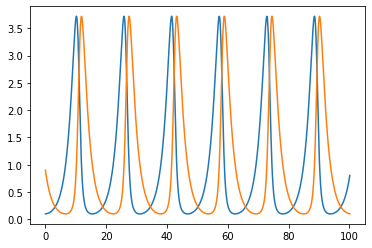

In [14]:
plt.plot(times, ys[:, 0], label="Prey")
plt.plot(times, ys[:, 1], label="Predator")